In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
import copy


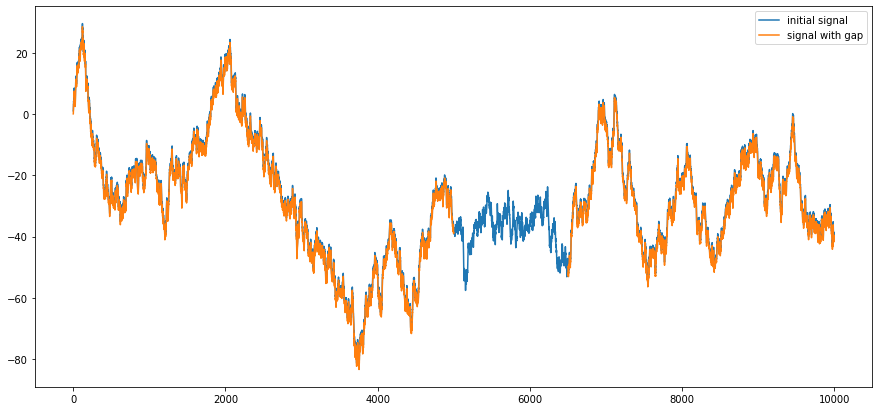

In [23]:
# number of points in signal
n_signal = 10000

# create signal
init_signal = np.cumsum(np.random.randn(n_signal))
gap_signal = copy.deepcopy(init_signal)

# remove a specified window
gap_boundaries = [5000, 6500]
gap_signal[range(gap_boundaries[0], gap_boundaries[1])] = np.nan

plt.figure(figsize=(15, 7))
plt.plot(init_signal+1, label='initial signal')
plt.plot(gap_signal, label='signal with gap')
plt.legend()
plt.show()


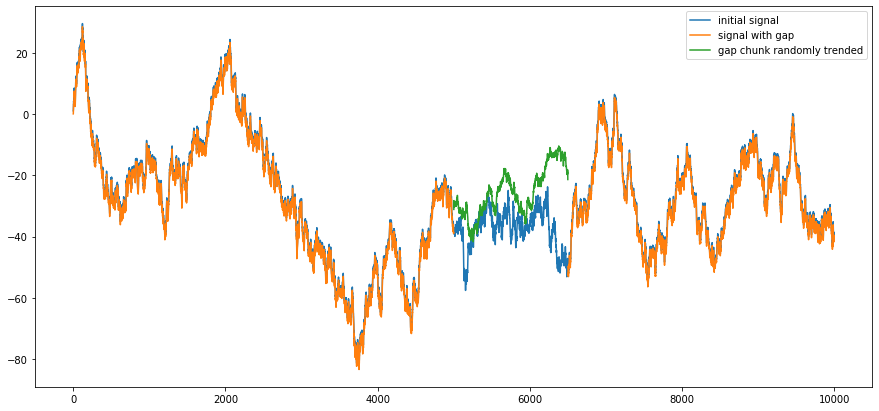

In [27]:
gap_size = gap_boundaries[1] - gap_boundaries[0]
pre_gap_signal = init_signal[gap_boundaries[0] - gap_size:gap_boundaries[0]]
post_gap_signal = init_signal[gap_boundaries[1]: gap_boundaries[1] + gap_size]

pre_gap_signal_fft = np.fft.fft(pre_gap_signal)
post_gap_signal_fft = np.fft.fft(post_gap_signal)
gap_chunk = np.fft.ifft(np.mean((pre_gap_signal_fft, post_gap_signal), axis=0))

filled_gap_signal = np.concatenate((init_signal[:gap_boundaries[0]],
                                    gap_chunk,
                                    init_signal[gap_boundaries[1]:]))

plt.figure(figsize=(15, 7))
plt.plot(init_signal + 1, label='initial signal')
plt.plot(gap_signal, label='signal with gap')
plt.plot(np.arange(gap_boundaries[0]+1, gap_boundaries[1]), gap_chunk[1:], label='gap chunk randomly trended')
plt.legend()
plt.show()


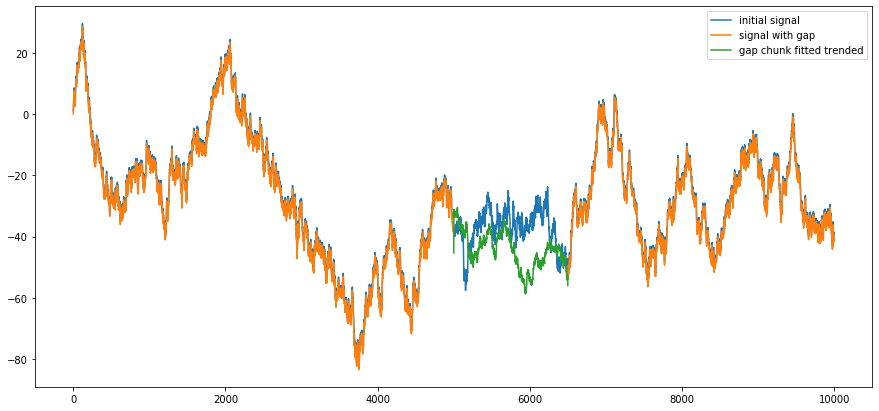

In [44]:
gap_chunk_detrended = signal.detrend(gap_chunk)
trend_line = \
    np.linspace(0, 1, gap_size) * (gap_signal[gap_boundaries[1] + 1] - gap_signal[gap_boundaries[0] - 1]) + gap_signal[
        gap_boundaries[0] - 1]

gap_chunk_trended = gap_chunk_detrended + trend_line

plt.figure(figsize=(15, 7))
plt.plot(init_signal + 1, label='initial signal')
plt.plot(gap_signal, label='signal with gap')
plt.plot(np.arange(gap_boundaries[0], gap_boundaries[1]), gap_chunk_trended, label='gap chunk fitted trended')
plt.legend()
plt.show()
